## Red Wine Quality Prediction using Regression

### Problem Statement

The dataset is related to the red variant of the Portuguese "Vinho Verde" wine. For more details,
consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical
(inputs) and sensory (the output) variables are available (e.g. there is no data about grape types,
wine brand, wine selling price, etc.).

These datasets can be viewed as regression tasks. The classes are ordered and not balanced (e.g.
there are much more normal wines than excellent or poor ones).

Apply Regression and find the quality of Wine


Attribute Information:

Input variables (based on physicochemical tests):

- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data):
- 12 - quality (score between 0 and 10)

### Import modules

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,mean_absolute_error
%matplotlib inline

### Load the dataset

In [6]:
df = pd.read_csv("winequality-red.csv")

In [7]:
# visualize the first ten rows of dataset
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [8]:
# Check the shape of the dataset for the number of rows and columns
df.shape

(1599, 12)

### Analyze the dataset

As we can see, the name of some columns contains spaces, which is something we do not really want when treating data, this is why we are going to replace spaces with "_" . 

In [9]:
# replace spaces with _ for each column
df.columns = df.columns.str.replace(" ","_")
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
# check whether there are object data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
# check whether there are missing values
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no object data types and null values in the dataset. Now, our dataset is "ready to go".

### Exploratory Data Analysis

Target variable is "quality". Let us plot some information about it.

In [13]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

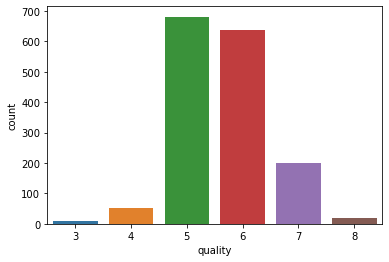

In [14]:
# visualizing the different quality values
sns.countplot(x=df["quality"])

In [15]:
df.count()

fixed_acidity           1599
volatile_acidity        1599
citric_acid             1599
residual_sugar          1599
chlorides               1599
free_sulfur_dioxide     1599
total_sulfur_dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

Let us study the correlation between our label "quality" and features of the dataset and check which are highly correlated and play an important role in predicting the quality of a wine

In [16]:
# calculate and order the correlations with respect to quality
correlations = df.corr()["quality"].sort_values(ascending=False)
correlations

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64

From the above data, we can infer that alcohol is highly and positively correlated with quality of wine whereas volatile_acidity is highly and negatively correlated with quality of wine.

<AxesSubplot:>

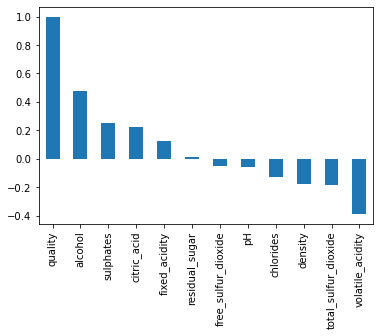

In [17]:
correlations.plot(kind="bar")

Let's plot the correlation matrix to have a better understanding of how features correlate ith each other.

<AxesSubplot:>

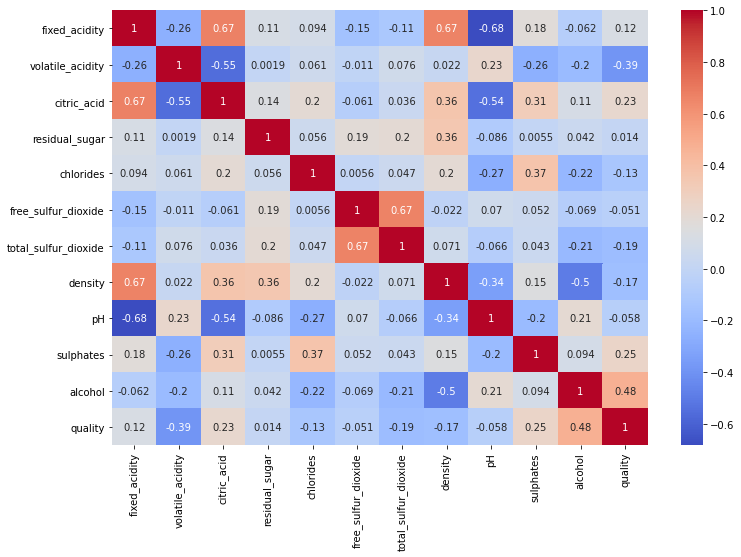

In [18]:
# heatmap to plot all correlations between features
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

From this matrix we can observe, apart from the information we had before, some obvious correlations ( threshold value >= 0.5 ) among features.

From all these features , we select those features having high correlation with quality and do not take into account those features whose values might be redundant and not provide information at all i.e, having high correlation among other features.


In [19]:
print(abs(correlations) > 0.2)

quality                  True
alcohol                  True
sulphates                True
citric_acid              True
fixed_acidity           False
residual_sugar          False
free_sulfur_dioxide     False
pH                      False
chlorides               False
density                 False
total_sulfur_dioxide    False
volatile_acidity         True
Name: quality, dtype: bool


From all the values, we are selecting alcohol, sulphates, citric_acid and volatile_acidity in order to study them better and see the distribution of values that separate the different qualities.

#### Alcohol percent in different quality wines

[Text(0.5, 1.0, 'Alcohol Percent in Different Quality Wines')]

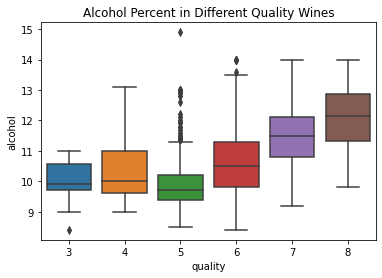

In [20]:
alc =sns.boxplot(x="quality",y="alcohol", data=df)
alc.set(title="Alcohol Percent in Different Quality Wines")

From the above boxplot,we can observe that the quality of wines is increasing when the percent of alcohol increased

#### Sulphates percent in different quality wines

[Text(0.5, 1.0, 'Sulphates Percent in Different Quality Wines')]

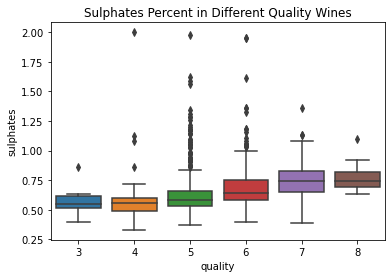

In [21]:
sp =sns.boxplot(x="quality",y="sulphates", data=df)
sp.set(title="Sulphates Percent in Different Quality Wines")

From the above boxplot,we can observe slight increment in the quality of wine as percent of sulphates increased

#### Citric acid percent in different quality wines

[Text(0.5, 1.0, 'Citric Acid Percent in Different Quality Wines')]

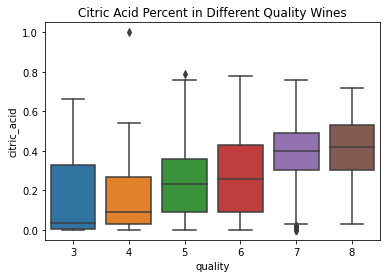

In [22]:
cit =sns.boxplot(x="quality",y="citric_acid", data=df)
cit.set(title="Citric Acid Percent in Different Quality Wines")

From the above boxplot, we can observe that adding citric acid to these wines seem to get higher quality ratings.

#### Volatile acid percent in different quality wines

[Text(0.5, 1.0, 'Volatile Acidity Percent in Different Quality Wines')]

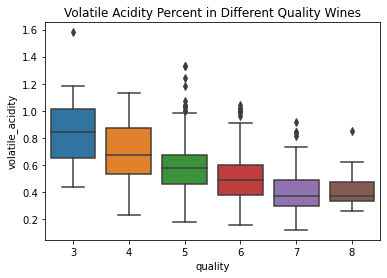

In [23]:
vol =sns.boxplot(x="quality",y="volatile_acidity", data=df)
vol.set(title="Volatile Acidity Percent in Different Quality Wines")

For the volatile acidity , we can clearly observe how less it is present, the wine will have high ratings

From the above features, we see obvious correlation between volatile_acidity and citric_acid, but we select volatile_acidity as it is having high correlation with quality than citric_acid

### Features Selection

In [24]:
# features having coefficient > threshold_value will be selected
def get_correlation(data, threshold):
    corr_col = []
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[i]
                if col_name not in corr_col:
                    corr_col.append(col_name)
    return corr_col

Slicing the dataset into features and label (quality)

In [25]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [26]:
x

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [27]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

### Split the data into training and testing datasets

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [29]:
corr_features = get_correlation(x_train,0.6)
corr_features

['citric_acid', 'total_sulfur_dioxide', 'density', 'pH']

Drop the columns of corr_features which are highly correlated to each other

In [30]:
x_train.drop(corr_features,axis=1)
x_test.drop(corr_features,axis=1)

,fixed_acidity,volatile_acidity,residual_sugar,chlorides,free_sulfur_dioxide,sulphates,alcohol
1109,10.8,0.470,2.10,0.171,27.0,0.76,10.8
1032,8.1,0.820,4.10,0.095,5.0,0.53,9.6
1002,9.1,0.290,2.05,0.063,13.0,0.84,11.7
487,10.2,0.645,1.80,0.053,5.0,0.42,10.0
979,12.2,0.450,1.40,0.075,3.0,0.63,10.4
...,...,...,...,...,...,...,...
794,10.1,0.270,2.30,0.065,7.0,0.53,12.5
813,6.9,0.390,2.10,0.102,4.0,0.58,11.4
1322,9.1,0.340,1.80,0.058,9.0,0.55,11.4
704,9.1,0.765,1.60,0.078,4.0,0.54,9.7


### Features scaling

In [31]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [32]:
x_train

array([[ 0.90103398,  0.05480282,  0.9094138 , ...,  0.52091013,
        -0.22358408, -0.95579434],
       [ 1.41998736, -1.47967601,  0.9094138 , ..., -1.16841553,
        -0.68130963, -0.76727388],
       [ 0.90103398, -0.98645067,  1.4208416 , ..., -0.3237527 ,
         0.74908272,  0.17532846],
       ...,
       [-0.25219574,  0.21921126,  0.19341488, ..., -0.12883051,
         0.17692578, -0.86153411],
       [ 2.68854005, -0.32881689,  1.11398492, ..., -0.06385645,
         0.11971008,  2.15479335],
       [ 0.84337249,  2.46612668,  0.24455766, ..., -0.38872677,
        -1.0246038 , -0.95579434]])

In [33]:
y_train

642     5
679     5
473     5
390     8
1096    6
       ..
763     5
835     5
1216    6
559     6
684     5
Name: quality, Length: 1279, dtype: int64

## Linear Regression

In [34]:
# fit the model
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [35]:
# predict using x_test values
y_pred = linear_reg.predict(x_test)
print(y_pred[:100])
y_pred = np.round(y_pred)

[5.76385478 4.98006946 6.64102493 5.27480699 5.93051034 4.95805557
 5.35105778 6.0594488  4.76558558 4.89268871 5.24932617 5.36800084
 5.68031947 5.0197175  5.51062764 6.41821707 6.83304011 5.71301548
 5.92193484 5.05501536 6.31417929 5.12991229 5.60598355 6.16576906
 5.4803782  4.93702179 5.13198248 6.51165656 5.29938172 6.28012667
 6.04884564 5.8237069  5.54373934 5.25886212 5.67621688 6.17757069
 5.13017354 5.52654811 6.39221706 5.75787899 5.39872148 6.06137627
 6.68743062 6.63429619 5.95888107 4.69146177 5.46197404 6.01848535
 5.46398874 6.10714487 5.30188276 5.27369029 5.79126048 6.34779126
 5.73410733 5.20017687 5.02744333 5.27115977 6.52689639 5.43550358
 5.14677243 5.74906082 6.04569753 6.26498692 5.02770371 6.12493522
 5.30526479 6.00106148 6.12865961 5.95517256 5.2948336  5.47729398
 4.9938974  5.55870363 5.59846992 6.22759332 5.37672307 5.28182758
 5.73271578 6.33180342 5.68078348 5.263103   5.903888   6.07235053
 5.46630304 5.34664952 6.23683579 4.99751831 5.29853871 4.9154

### Accuracy of Linear Regression Model

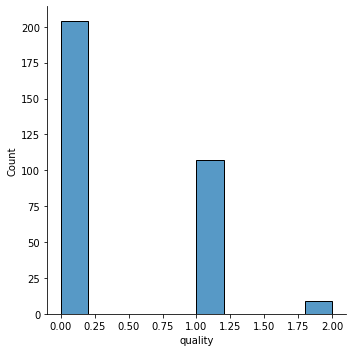

In [36]:
# Plotting absolute error between each value of predicted value and test label value
sns.displot(abs(y_test-y_pred))

In [37]:
# Evaluation of the model
print('Mean Absolute Error     : ',mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error : ',np.sqrt(mean_absolute_error(y_test,y_pred)))

Mean Absolute Error     :  0.390625
Root Mean Squared Error :  0.625


In [38]:
acc_score = round(accuracy_score(y_test, y_pred)*100,2)
print("Accuracy of the Linear Regression model = ",acc_score,"%")

Accuracy of the Linear Regression model =  63.75 %


In [39]:
cnf = confusion_matrix(y_test,y_pred)
cnf

array([[ 0,  0,  2,  0,  0,  0],
       [ 0,  0,  6,  5,  0,  0],
       [ 0,  0, 98, 37,  0,  0],
       [ 0,  0, 37, 98,  7,  0],
       [ 0,  0,  1, 18,  8,  0],
       [ 0,  0,  0,  1,  2,  0]], dtype=int64)

<AxesSubplot:>

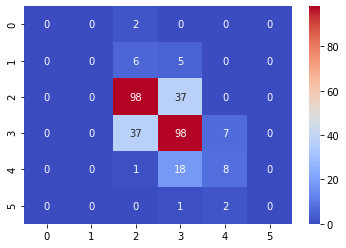

In [40]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot = True,cmap="coolwarm")

## SVM Regressor

In [41]:
svr = SVR(kernel="rbf")
svr.fit(x_train, y_train)

SVR()

In [42]:
y_pred_svr = svr.predict(x_test)
print(y_pred_svr[:100])
y_pred_svr = np.round(y_pred_svr)

[5.17903702 5.14845317 7.10553887 4.77456949 6.0338929  5.16703022
 5.03361104 5.9318447  5.17021596 5.03451175 4.94984288 5.36705622
 5.55486934 5.32042706 5.44837764 6.31816611 6.94421334 5.26576673
 5.37811434 5.3263166  6.03088053 5.27677591 5.68925241 5.69316222
 5.44156445 5.16947347 5.16295796 6.87048635 4.98567844 6.01909674
 5.82482559 5.88416724 5.63132275 5.47272656 5.99189559 5.98368405
 5.29160653 5.89443767 6.16048378 5.91066517 5.18236269 6.81597414
 6.40340408 6.54264366 5.91399365 5.10468599 5.07560749 5.74144969
 5.0597736  5.87354451 4.82637864 5.1466579  6.17091853 6.24679156
 5.48866614 5.2057999  4.92373067 5.06374203 6.80404349 5.6594908
 5.08388336 5.85821204 6.05680266 5.6944063  5.11920099 6.18730731
 5.09774827 5.14551783 6.33015738 6.13570689 5.24542807 5.25924317
 4.91065093 5.22311425 5.57865288 5.96474834 5.34650563 5.05062565
 4.98727921 6.59758146 5.49725695 5.1065959  5.81876333 5.78514356
 5.49382082 5.71047887 6.01983915 4.81376262 5.41304854 4.89960

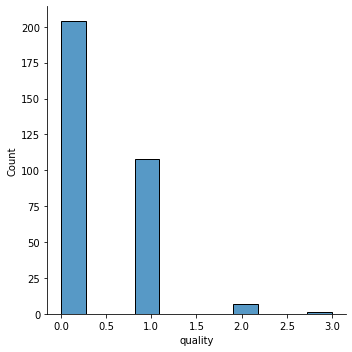

In [43]:
# Plotting absolute error between each value of predicted value and test label value
sns.displot(abs(y_test-y_pred_svr))

In [44]:
# Evaluation of the model
print('Mean Absolute Error     : ',mean_absolute_error(y_test, y_pred_svr))
print('Root Mean Squared Error : ',np.sqrt(mean_absolute_error(y_test,y_pred_svr)))

Mean Absolute Error     :  0.390625
Root Mean Squared Error :  0.625


### Accuracy of SVM Regressor Model

In [45]:
acc_score_svr = round(accuracy_score(y_test, y_pred_svr)*100,2)
print("Accuracy of the SVM Regressor model = ",acc_score_svr,"%")

Accuracy of the SVM Regressor model =  63.75 %


<AxesSubplot:>

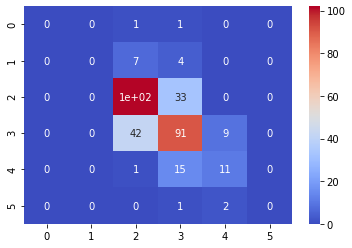

In [46]:
cf_matrix = confusion_matrix(y_test, y_pred_svr)
sns.heatmap(cf_matrix, annot = True,cmap="coolwarm")

## Decision Tree Regressor

In [47]:
dtr = DecisionTreeRegressor(random_state=142)
dtr.fit(x_train, y_train)

DecisionTreeRegressor(random_state=142)

In [48]:
y_pred_dtr = dtr.predict(x_test)
print(y_pred_dtr)
y_pred_dtr = np.round(y_pred_dtr)

[5. 6. 7. 5. 4. 6. 6. 6. 6. 5. 5. 5. 6. 5. 5. 5. 7. 5. 5. 5. 7. 5. 6. 5.
 6. 5. 5. 6. 5. 7. 6. 7. 5. 5. 6. 7. 5. 6. 7. 5. 5. 6. 6. 7. 6. 5. 5. 6.
 4. 7. 6. 6. 6. 8. 5. 5. 5. 5. 7. 6. 5. 6. 6. 6. 5. 6. 5. 5. 7. 7. 6. 6.
 4. 5. 6. 6. 6. 6. 5. 7. 6. 5. 7. 6. 6. 5. 4. 5. 6. 5. 5. 6. 5. 5. 5. 6.
 7. 4. 5. 6. 6. 5. 6. 5. 5. 5. 5. 5. 6. 5. 6. 5. 6. 5. 5. 6. 5. 6. 7. 6.
 5. 5. 5. 5. 6. 6. 5. 6. 6. 6. 5. 6. 6. 6. 6. 5. 6. 5. 6. 5. 6. 6. 5. 5.
 5. 6. 6. 6. 5. 5. 5. 5. 5. 5. 6. 6. 4. 6. 4. 6. 6. 6. 6. 5. 5. 5. 6. 6.
 6. 6. 6. 5. 5. 7. 6. 6. 7. 7. 7. 5. 4. 7. 6. 6. 6. 6. 5. 6. 5. 5. 6. 6.
 6. 5. 5. 5. 5. 5. 5. 5. 5. 6. 5. 6. 3. 5. 5. 7. 6. 6. 5. 6. 5. 7. 5. 6.
 6. 6. 6. 5. 5. 5. 6. 6. 5. 6. 6. 7. 6. 6. 5. 6. 6. 5. 6. 6. 6. 7. 7. 6.
 5. 6. 5. 5. 7. 5. 5. 5. 5. 6. 5. 5. 5. 4. 4. 5. 5. 5. 6. 7. 5. 6. 5. 6.
 6. 5. 5. 5. 5. 6. 5. 5. 6. 6. 7. 6. 6. 5. 6. 5. 5. 6. 5. 6. 6. 5. 6. 5.
 7. 4. 5. 5. 6. 6. 6. 6. 6. 6. 6. 5. 6. 5. 5. 5. 6. 6. 6. 5. 5. 5. 5. 6.
 5. 4. 5. 5. 6. 6. 5. 7.]


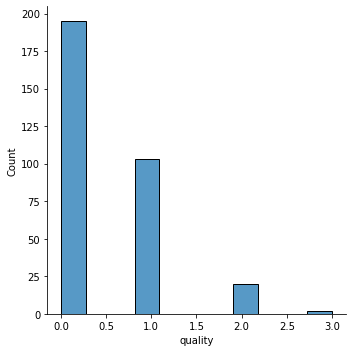

In [49]:
# Plotting absolute error between each value of predicted value and test label value
sns.displot(abs(y_test-y_pred_dtr))

In [50]:
# Evaluation of the model
print('Mean Absolute Error     : ',mean_absolute_error(y_test, y_pred_dtr))
print('Root Mean Squared Error : ',np.sqrt(mean_absolute_error(y_test,y_pred_dtr)))

Mean Absolute Error     :  0.465625
Root Mean Squared Error :  0.6823672031978091


### Accuracy of Decision Tree Regressor Model

In [51]:
acc_score_dtr = round(accuracy_score(y_test, y_pred_dtr)*100,2)
print("Accuracy of the Decision Tree Regressor model = ",acc_score_dtr,"%")

Accuracy of the Decision Tree Regressor model =  60.94 %


<AxesSubplot:>

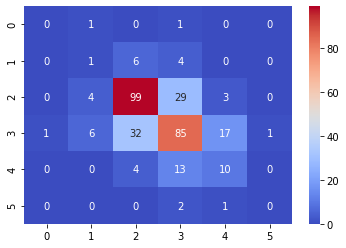

In [52]:
cf_matrix = confusion_matrix(y_test, y_pred_dtr)
sns.heatmap(cf_matrix, annot = True,cmap="coolwarm")

## Random Forest Regressor

In [53]:
rfr = RandomForestRegressor(n_estimators=10,random_state = 1)
rfr.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=1)

In [54]:
y_pred_rfr = rfr.predict(x_test)
print(y_pred_rfr)
y_pred_rfr = np.round(y_pred_rfr)

[5.5 4.7 6.9 4.8 5.  5.4 5.3 5.9 4.9 5.3 5.1 5.4 5.7 4.7 5.6 5.9 7.1 4.9
 5.5 5.1 6.1 5.5 5.5 6.1 5.7 4.9 5.5 6.7 5.  6.5 5.7 5.6 5.7 5.3 6.  6.6
 5.1 5.9 6.  5.7 5.1 6.4 6.6 6.5 6.  4.7 5.  5.8 5.5 6.  5.  5.3 5.6 6.2
 5.5 5.  5.2 5.2 6.8 5.5 5.3 5.5 5.8 6.  5.2 6.2 5.2 5.  6.4 6.3 5.5 5.5
 4.5 5.1 5.8 6.  5.1 5.1 5.  6.2 5.6 4.9 5.5 5.7 5.6 5.6 5.5 5.  5.4 5.1
 5.  5.3 6.  5.  5.4 5.5 6.3 4.8 5.6 5.4 6.9 5.9 5.9 5.5 5.1 4.6 5.1 5.3
 6.  5.  6.  5.1 7.3 5.5 5.7 5.5 4.9 6.7 5.8 5.5 5.2 5.5 5.3 4.8 7.  6.3
 5.2 4.9 5.6 6.5 5.5 5.1 6.2 6.1 5.9 5.  5.6 5.2 6.  5.8 5.8 5.  5.  5.5
 5.4 5.7 7.3 5.9 5.7 5.  6.2 5.6 5.3 5.1 5.8 5.6 5.6 4.8 6.2 5.4 5.5 5.6
 6.8 5.3 5.1 4.9 5.9 6.3 5.9 5.9 6.  5.1 4.9 6.9 5.1 6.5 5.9 6.9 6.8 4.8
 5.5 6.9 5.6 6.4 6.3 5.2 5.2 5.9 5.4 5.6 6.1 5.4 5.5 5.5 5.4 5.1 5.1 5.5
 5.8 5.3 5.  6.2 5.5 5.4 5.4 5.4 5.  6.5 6.2 5.4 5.9 6.2 5.  6.4 4.7 5.6
 5.2 6.4 6.  5.3 5.2 5.9 6.7 5.6 5.4 6.2 6.2 6.3 5.7 5.5 5.4 5.9 5.  5.5
 6.2 5.8 6.  7.  6.4 6.  5.2 5.4 5.  4.9 5.7 5.1 5.

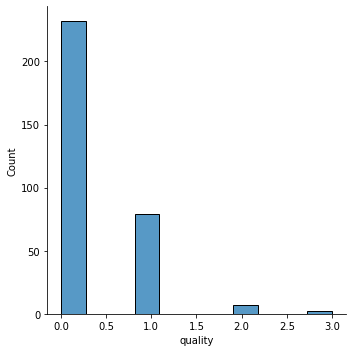

In [55]:
# Plotting absolute error between each value of predicted value and test label value
sns.displot(abs(y_test-y_pred_rfr))

In [56]:
# Evaluation of the model
print('Mean Absolute Error     : ',mean_absolute_error(y_test, y_pred_rfr))
print('Root Mean Squared Error : ',np.sqrt(mean_absolute_error(y_test,y_pred_rfr)))

Mean Absolute Error     :  0.309375
Root Mean Squared Error :  0.5562148865321748


### Accuracy of Random Forest Regressor Model

In [57]:
acc_score_rfr = round(accuracy_score(y_test, y_pred_rfr)*100,2)
print("Accuracy of the Random Forest Regressor model = ",acc_score_rfr,"%")

Accuracy of the Random Forest Regressor model =  72.5 %


<AxesSubplot:>

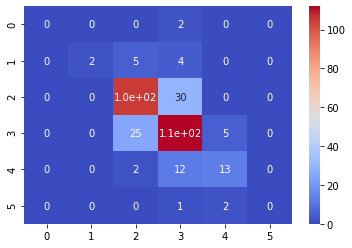

In [58]:
cf_matrix = confusion_matrix(y_test, y_pred_rfr)
sns.heatmap(cf_matrix, annot = True,cmap="coolwarm")

From this observations, we have found for this particular dataset RANDOM FOREST REGRESSOR predicted the QUALITY OF RED WINE with highest accuracy, followed by LINEAR REGRESSION and SVM REGRESSION. DECISION TREES REGRESSION  had the minimum accuracy.

We have improved the model by selecting the features that best fits the model using correlations
